# A Collection of Basic OPAL Post-Processing Routines

In [1]:
%matplotlib notebook

In [2]:
import sys
sys.path.append('/Users/chall/research/github/olive/olive/dataio/')
from SDDS import readSDDS
from ipywidgets import interact
from collections import OrderedDict

## Load HDF5 Output

In [3]:
pcdata = h5.File('RFphotoinjector.h5', 'r')

In [4]:
for attr in pcdata.attrs:
    print attr, pcdata.attrs[attr]

OPAL_version OPAL 1.4.0 git rev. 
tUnit s
xUnit m
yUnit m
zUnit m
pxUnit #beta#gamma
pyUnit #beta#gamma
pzUnit #beta#gamma
qUnit Cb
idUnit 1
ptype 1
lastsection 1
SPOSUnit m
TIMEUnit s
#gammaUnit 1
ENERGYUnit MeV
#varepsilonUnit m rad
#varepsilonrUnit m rad
#varepsilon-geomUnit m rad
#sigmaUnit 1
RMSXUnit m
RMSRUnit m
RMSPUnit #beta#gamma
maxdEUnit MeV
max#phiUnit deg
phizUnit deg
dEUnit MeV
MASSUnit GeV
CHARGEUnit C
spos-headUnit m
E-headUnit MV/m
B-headUnit T
spos-refUnit m
E-refUnit MV/m
B-refUnit T
spos-tailUnit m
E-tailUnit MV/m
B-tailUnit T
StepUnit 1
LocalTrackStepUnit 1
GlobalTrackStepUnit 1
NumBunchUnit 1
NumPartUnit 1
RefPartRUnit m
RefPartPUnit #beta#gamma
SteptoLastInjUnit 1
dump frequency [300]
dPhiGlobal [  2.00393116e-11]
nAutoPhaseCavities [1]
Cav-1-name GUN
Cav-1-value [ 2.45220358]


### Contains Statistics at Recorded timesteps

In [5]:
for attr in pcdata['Step#0'].attrs:
    print attr

OPAL_flavour
SPOS
RefPartR
centroid
RMSX
RefPartP
MEANP
RMSP
#varepsilon
#varepsilon-geom
minX
maxX
minP
maxP
Step
LocalTrackStep
GlobalTrackStep
#sigma
TIME
ENERGY
dE
MASS
CHARGE
NumBunch
SteptoLastInj
spos-head
spos-ref
spos-tail
B-ref
E-ref
B-head
E-head
B-tail
E-tail


### Read in some emittance data

In [6]:
s = []
eps = []
for step in range(62):
    s.append(pcdata['Step#{}'.format(step)].attrs['SPOS'])
    eps.append(pcdata['Step#{}'.format(step)].attrs['#varepsilon'])
    
s = np.array(s)
eps = np.array(eps)

<IPython.core.display.Javascript object>


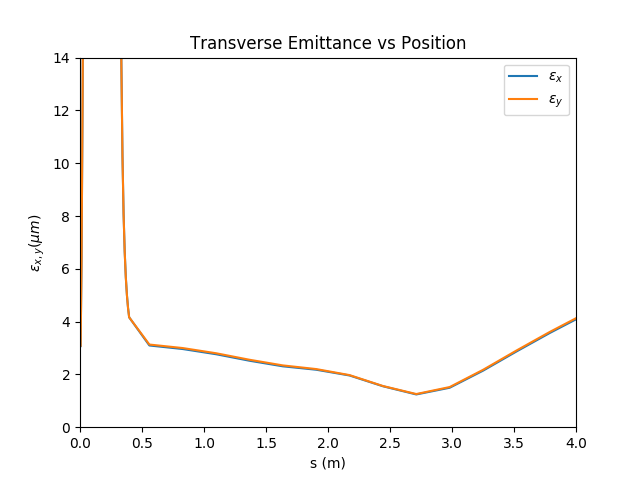

In [7]:
plt.figure()
plt.title("Transverse Emittance vs Position")

plt.plot(s, eps[:,0]*1e6, label=r'$\varepsilon_x$')
plt.plot(s, eps[:,1]*1e6, label=r'$\varepsilon_y$')


plt.xlabel("s (m)")
plt.ylabel(r"$\varepsilon_{x,y}  (\mu m)$")

plt.legend()

plt.xlim(0, 4.)
plt.ylim(0, 14.)

plt.show()

# Phase Space Plots

In [8]:
class interactive_phasespace():
    def __init__(self, file=pcdata):
        self.file = file
        self.x = 0
        self.y = 1

    def __call__(self):
        steps = len(self.file.keys()) - 1
        formatter = OrderedDict()
        formatter['x'] = 0
        formatter['px'] = 1
        formatter['y'] = 2
        formatter['py'] = 3
        formatter['z'] = 4
        formatter['pz'] = 5
        _ = interact(self.plot_phasespace, step=(0, steps, 1),
                     x=formatter, y=formatter)
            
    def plot_phasespace(self, step, x, y):
        self.x = x
        self.y = y
        coordinates = ['x', 'px', 'y', 'py', 'z', 'pz']
        units = ['m', r'$\beta\gamma$', 'm', r'$\beta\gamma$', 'z', r'$\beta\gamma$']

        fig, ax = plt.subplots(1, 1)
        ax.scatter(self.file['Step#{}/{}'.format(step, coordinates[self.x])],
                   self.file['Step#{}/{}'.format(step, coordinates[self.y])])
        
        ax.set_xlabel("{} ({})".format(coordinates[self.x], units[self.x]))
        ax.set_ylabel("{} ({})".format(coordinates[self.y], units[self.y]))
    

In [9]:
plot_phasespace = interactive_phasespace()
plot_phasespace()

Widget Javascript not detected.  It may not be installed or enabled properly.


# Comparing HDF5 and SDDS Outputs

### Read Energy data from HDF5

In [10]:
t = []
for step in range(62):
    t.append(pcdata['Step#{}'.format(step)].attrs['TIME'])
energy = []
for step in range(62):
    energy.append(pcdata['Step#{}'.format(step)].attrs['ENERGY'])

### Read in SDDS File  

In [11]:
pcfile = readSDDS('test.stat')
parameters = pcfile.read_params()
columns = pcfile.read_columns()

used
(1876, 4)


### Plot HDF5 and SDDS Energy data
#### Can see SDDS captures at much higher rate

<IPython.core.display.Javascript object>


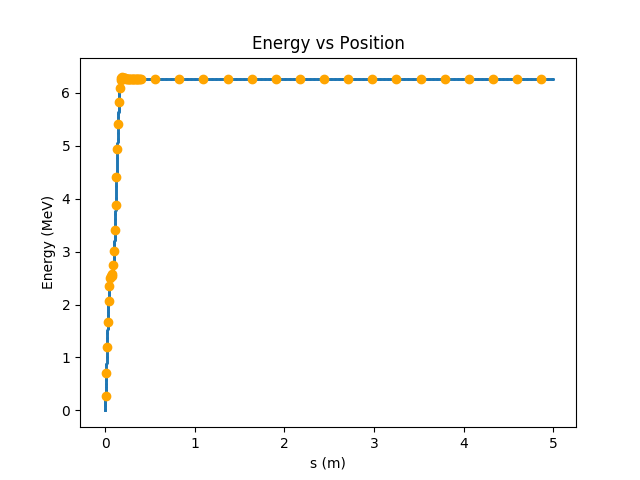

In [12]:
plt.figure()

plt.title("Energy vs Position")
plt.scatter(columns[:, 1], columns[:, 4], s=1)
plt.scatter(s, energy, c='orange')

plt.ylabel("Energy (MeV)")
plt.xlabel("s (m)")

plt.show()

# Field Map Plots

#### TODO: Color rescale to zero

In [13]:
# Row 1: File type
# Row 2: minz, maxz, number of steps - 1
# Row 3: Frequency
# Row 4: minr, maxr, number of steps - 1
gun_field = np.loadtxt('DriveGun.T7', dtype='float', skiprows=4)

In [14]:
zmin = 0.
zmax = 29.270745
zstep = 301
rmin = 0.
rmax = 2.5
rstep = 11

In [15]:
gun_field = gun_field.reshape(rstep, zstep, 4)

In [16]:
z = np.linspace(zmin, zmax, zstep)
r = np.linspace(rmin, rmax, rstep)
Z, R = np.meshgrid(z, r)

<IPython.core.display.Javascript object>


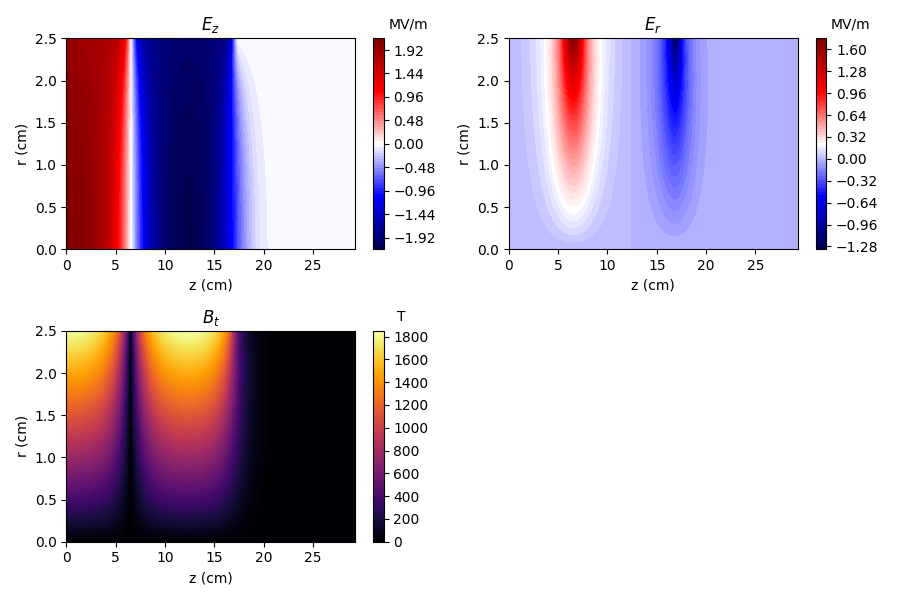

In [25]:
fig1 = plt.figure(figsize=(9, 6))

ax = []
for i in range(3):
        ax.append(fig1.add_subplot(2, 2, i + 1))
        
color_maps = [plt.cm.seismic, plt.cm.seismic, plt.cm.inferno]
titles = [r'$E_z$', r'$E_r$', r'$B_t$']
colorbar_titles = ['MV/m', 'MV/m', 'T']
for i in range(3):
    if i != 2:
        field_contours = ax[i].contourf(Z, R, gun_field[:, :, i], 80, cmap=color_maps[i])
    else:
        field_contours = ax[i].contourf(Z, R, 
                                        np.sqrt(gun_field[:, :, 2]**2 + gun_field[:, :, 3]**2), 
                                        80, cmap=color_maps[i])
    ax[i].set_title(titles[i])
    cbar = plt.colorbar(field_contours, ax=ax[i])
    cbar.set_label(colorbar_titles[i], labelpad=-20, y=1.10, rotation=0)
    ax[i].set_xlabel('z (cm)')
    ax[i].set_ylabel('r (cm)')

plt.tight_layout()
plt.show()

In [18]:
def display_gif(fn):
    from IPython import display
    return display.HTML('<img src="{}">'.format(fn))

In [19]:
display_gif('congaparrot.gif')